# Clasificador paisajes
Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en el Classroom como `seg_train.zip` y `seg_test.zip`. Se pide:
1. Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones).
2. Investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.
3. Normaliza
4. Diseña la arquitectura de la red. Recuerda que es un algoritmo de clasificación. Ojo con las dimensiones de la entrada
5. Reserva un 20% de los datos del entrenamiento para validar.
6. Representa el objeto history
7. Evalua el modelo con los datos de test
8. Representa algunos de los paisajes donde el modelo comete errores
9. Crea una matriz de confusión con los errores del modelo

**NOTA apartado 1**: para el apartado 1 tendras que recorre las carpetas/imagenes con `os.listdir()`, e ir cargando todas las imagenes como arrays de numpy

**NOTA apartado 4**: empieza con un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer. on softmax como ultima capa

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import cv2
from skimage.io import imread

from tensorflow import keras
from sklearn.metrics import confusion_matrix

In [11]:
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
class_names_label

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [6]:
os.getcwd() + "\\data\\seg_train"

'd:\\Bootcamp\\Carpeta_profesor\\2402_dsft_thebridge\\3-Machine_Learning\\5-Deep_Learning\\2-Redes_Convolucionales\\ejercicios\\data\\seg_train'

In [7]:
os.listdir()

['Clasificador_paisajes.ipynb', 'data']

In [8]:
IMAGE_SIZE = (32,32)
TRAIN_PATH = os.getcwd() + "\\data\\seg_train"
TEST_PATH = os.getcwd() + "\\data\\seg_test"

In [13]:
def read_data(path, im_size):
    X = []
    y = []

    for folder in os.listdir(path):
        label = class_names_label[folder]
        folder_path = os.path.join(path, folder)

        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            try:
                image = imread(image_path)
                smallimage = cv2.resize(image, im_size)
                X.append(smallimage)
                y.append(label)
            except:
                print("Error en lectura imagen", image_path)

    return np.array(X), np.array(y)


In [14]:
X_train, y_train = read_data(TRAIN_PATH, IMAGE_SIZE)
X_test, y_test = read_data(TEST_PATH, IMAGE_SIZE)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python311\Lib\site-packages\imageio\plugins\spe.py:507: UserWarning: The file header of d:\Bootcamp\Carpeta_profesor\2402_dsft_thebridge\3-Machine_Learning\5-Deep_Learning\2-Redes_Convolucionales\ejercicios\data\seg_train\mountain\seg_train - Acceso directo.lnk claims there are 7340141 frames, but there are actually 17 frames.
  warnings.warn(


Error en lectura imagen d:\Bootcamp\Carpeta_profesor\2402_dsft_thebridge\3-Machine_Learning\5-Deep_Learning\2-Redes_Convolucionales\ejercicios\data\seg_train\mountain\seg_train - Acceso directo.lnk
(14034, 32, 32, 3)
(3000, 32, 32, 3)
(14034,)
(3000,)


In [15]:
pd.Series(y_train).value_counts()

3    2512
2    2404
5    2382
4    2274
1    2271
0    2191
dtype: int64

In [16]:
pd.Series(y_test).value_counts()

2    553
3    525
4    510
5    501
1    474
0    437
dtype: int64

In [18]:
y_train[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

In [20]:
y_train[:100]

array([0, 5, 5, 4, 3, 2, 3, 3, 0, 5, 0, 3, 5, 4, 2, 4, 4, 5, 1, 3, 2, 0,
       2, 2, 5, 1, 3, 5, 0, 3, 5, 5, 5, 2, 1, 2, 5, 4, 0, 1, 5, 1, 0, 4,
       0, 5, 1, 2, 3, 5, 4, 0, 2, 3, 5, 4, 0, 4, 1, 3, 3, 2, 4, 4, 2, 3,
       2, 1, 5, 3, 4, 1, 5, 1, 2, 1, 2, 1, 5, 3, 4, 5, 3, 1, 2, 3, 1, 4,
       4, 0, 3, 3, 4, 1, 5, 1, 5, 4, 1, 2])

glacier


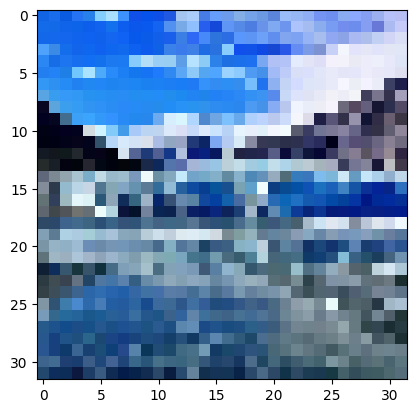

In [31]:
index = np.random.randint(X_train.shape[0])
print(class_names[y_train[index]])
plt.imshow(X_train[index]);

In [34]:
X_train

array([[[[225, 225, 225],
         [221, 223, 222],
         [221, 223, 222],
         ...,
         [237, 237, 237],
         [238, 238, 238],
         [240, 240, 240]],

        [[230, 230, 230],
         [227, 227, 227],
         [232, 232, 232],
         ...,
         [244, 244, 244],
         [244, 244, 244],
         [246, 246, 246]],

        [[ 55,  55,  55],
         [223, 223, 223],
         [ 88,  87,  88],
         ...,
         [245, 245, 245],
         [246, 246, 246],
         [246, 246, 246]],

        ...,

        [[114, 112, 111],
         [ 97,  96,  94],
         [125, 123, 124],
         ...,
         [ 90,  89,  87],
         [ 88,  87,  85],
         [ 92,  91,  89]],

        [[153, 152, 150],
         [113, 112, 110],
         [123, 121, 122],
         ...,
         [ 83,  82,  79],
         [ 68,  67,  65],
         [ 80,  79,  77]],

        [[131, 130, 128],
         [133, 132, 130],
         [128, 126, 125],
         ...,
         [128, 127, 125],
        

In [35]:
X_train[0][0][0][0]

225

In [36]:
print(X_train.min())
print(X_train.max())

0
255


In [37]:
X_train = X_train/255
X_test = X_test/255

In [38]:
print(X_train.min())
print(X_train.max())

0.0
1.0


In [39]:
X_train.shape

(14034, 32, 32, 3)

In [41]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Dense(16),
    keras.layers.Dense(6, activation="softmax")
])

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [43]:
64 * (3*3) * 3 + 64

1792

In [44]:
32 * (3*3) * 64 + 32

18464

In [45]:
6*6*32

1152

In [47]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
14034 * 0.8 /128 

In [48]:
history = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.2
)

Epoch 1/20


88/88 [==============================] - 7s 62ms/step - loss: 1.2087 - accuracy: 0.5399 - val_loss: 0.9847 - val_accuracy: 0.6413
Epoch 2/20
88/88 [==============================] - 6s 73ms/step - loss: 0.9428 - accuracy: 0.6495 - val_loss: 0.8609 - val_accuracy: 0.6915
Epoch 3/20
88/88 [==============================] - 7s 76ms/step - loss: 0.8408 - accuracy: 0.6916 - val_loss: 0.8967 - val_accuracy: 0.6776
Epoch 4/20
88/88 [==============================] - 7s 76ms/step - loss: 0.8106 - accuracy: 0.7056 - val_loss: 0.8129 - val_accuracy: 0.7082
Epoch 5/20
88/88 [==============================] - 7s 77ms/step - loss: 0.7685 - accuracy: 0.7208 - val_loss: 0.7828 - val_accuracy: 0.7150
Epoch 6/20
88/88 [==============================] - 7s 74ms/step - loss: 0.7289 - accuracy: 0.7372 - val_loss: 0.8060 - val_accuracy: 0.7132
Epoch 7/20
88/88 [==============================] - 7s 79ms/step - loss: 0.7033 - accuracy: 0.7478 - val_loss: 0.8026 - val_accuracy: 0.7125
Epoch 8/20


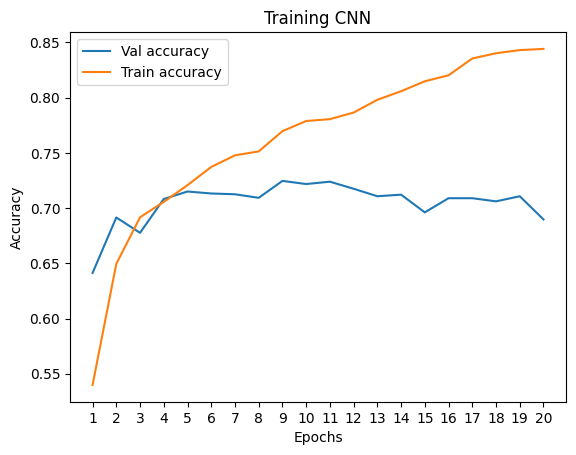

In [49]:
df_hist = pd.DataFrame(history.history, index=np.arange(1,21))
plt.plot(df_hist['val_accuracy'], label="Val accuracy")
plt.plot(df_hist['accuracy'], label="Train accuracy")
plt.title("Training CNN")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(range(1,21))
plt.legend()

In [50]:
results = model.evaluate(X_test, y_test)

94/94 [==============================] - 1s 6ms/step - loss: 1.0070 - accuracy: 0.6857


In [52]:
y_pred = model.predict(X_test)
y_pred.round(2)

94/94 [==============================] - 1s 5ms/step


array([[0.  , 0.  , 0.3 , 0.69, 0.01, 0.  ],
       [0.  , 0.  , 0.98, 0.01, 0.01, 0.  ],
       [0.  , 0.  , 0.  , 0.93, 0.07, 0.  ],
       ...,
       [0.  , 0.  , 0.08, 0.22, 0.7 , 0.  ],
       [0.  , 0.  , 0.  , 0.04, 0.96, 0.  ],
       [0.  , 0.85, 0.  , 0.  , 0.  , 0.15]], dtype=float32)

In [53]:
IMAGE_SIZE = (64,64)

In [54]:
X_train, y_train = read_data(TRAIN_PATH, IMAGE_SIZE)
X_test, y_test = read_data(TEST_PATH, IMAGE_SIZE)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14034, 64, 64, 3)
(3000, 64, 64, 3)
(14034,)
(3000,)


In [55]:
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)
X_train = X_train/255
X_test = X_test/255

In [56]:
print(X_train.shape)

(14034, 64, 64, 3)


In [58]:
model_2 = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), input_shape=(64,64,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128, (3,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Dense(32),
    keras.layers.Dense(6, activation="softmax")
])
model_2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history_2 = model_2.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=30,
    validation_split=0.2,
    callbacks=[keras.callbacks.EarlyStopping(patience=5)]
)

Epoch 1/30
176/176 [==============================] - 87s 471ms/step - loss: 1.1191 - accuracy: 0.5761 - val_loss: 0.9063 - val_accuracy: 0.6523
Epoch 2/30
176/176 [==============================] - 97s 552ms/step - loss: 0.8446 - accuracy: 0.6903 - val_loss: 0.8391 - val_accuracy: 0.6940
Epoch 3/30
176/176 [==============================] - 76s 432ms/step - loss: 0.7459 - accuracy: 0.7337 - val_loss: 0.9009 - val_accuracy: 0.6512
Epoch 4/30
176/176 [==============================] - 65s 369ms/step - loss: 0.6622 - accuracy: 0.7618 - val_loss: 0.7878 - val_accuracy: 0.7007
Epoch 5/30
176/176 [==============================] - 66s 378ms/step - loss: 0.5738 - accuracy: 0.7901 - val_loss: 0.7653 - val_accuracy: 0.7264
Epoch 6/30
176/176 [==============================] - 60s 343ms/step - loss: 0.4912 - accuracy: 0.8266 - val_loss: 0.8336 - val_accuracy: 0.7121
Epoch 7/30
176/176 [==============================] - 56s 319ms/step - loss: 0.4190 - accuracy: 0.8516 - val_loss: 0.8871 - val_ac

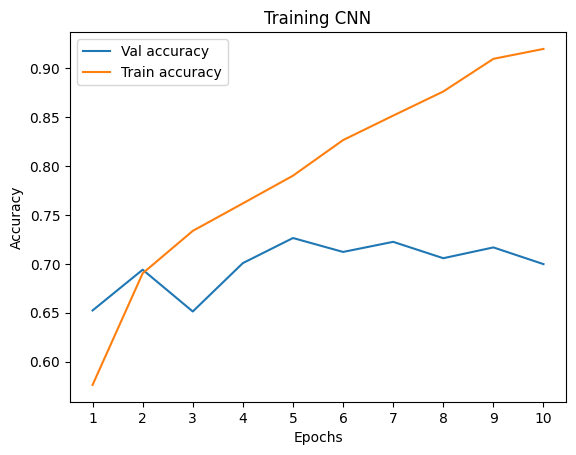

In [60]:
df_hist = pd.DataFrame(history_2.history, index=np.arange(1,11))
plt.plot(df_hist['val_accuracy'], label="Val accuracy")
plt.plot(df_hist['accuracy'], label="Train accuracy")
plt.title("Training CNN")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(range(1,11))
plt.legend()

In [62]:
results = model_2.evaluate(X_test, y_test)

94/94 [==============================] - 5s 53ms/step - loss: 1.2853 - accuracy: 0.7043


In [63]:
y_pred = model_2.predict(X_test)
y_pred.round(2)

94/94 [==============================] - 4s 43ms/step


array([[0.  , 0.  , 0.7 , 0.29, 0.  , 0.  ],
       [0.01, 0.  , 0.75, 0.  , 0.24, 0.  ],
       [0.01, 0.  , 0.  , 0.92, 0.06, 0.  ],
       ...,
       [0.05, 0.  , 0.03, 0.78, 0.14, 0.  ],
       [0.  , 0.  , 0.12, 0.  , 0.88, 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]], dtype=float32)

mountain


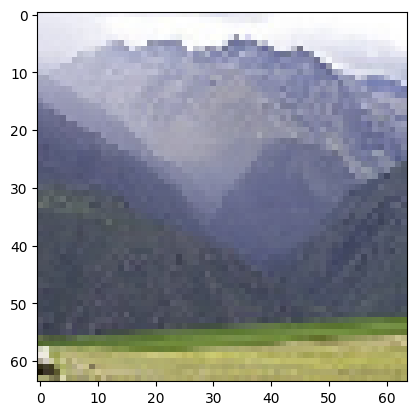

In [64]:
print(class_names[y_test[0]])
plt.imshow(X_test[0])

In [65]:
pred_labels = np.argmax(y_pred, axis=1)
print(pred_labels)
pred_names = [class_names[pred] for pred in pred_labels]
print(pred_names)

[2 2 3 ... 3 4 1]
['glacier', 'glacier', 'mountain', 'buildings', 'street', 'glacier', 'sea', 'sea', 'buildings', 'street', 'sea', 'buildings', 'street', 'mountain', 'buildings', 'forest', 'glacier', 'forest', 'street', 'street', 'buildings', 'buildings', 'glacier', 'sea', 'sea', 'street', 'glacier', 'glacier', 'buildings', 'mountain', 'street', 'mountain', 'forest', 'street', 'buildings', 'buildings', 'sea', 'mountain', 'buildings', 'glacier', 'buildings', 'buildings', 'buildings', 'forest', 'mountain', 'mountain', 'sea', 'buildings', 'street', 'glacier', 'glacier', 'forest', 'buildings', 'sea', 'buildings', 'street', 'sea', 'sea', 'buildings', 'glacier', 'buildings', 'forest', 'buildings', 'buildings', 'buildings', 'glacier', 'sea', 'mountain', 'glacier', 'forest', 'sea', 'street', 'buildings', 'mountain', 'glacier', 'forest', 'sea', 'street', 'buildings', 'mountain', 'mountain', 'mountain', 'forest', 'glacier', 'sea', 'buildings', 'street', 'glacier', 'mountain', 'street', 'building

<Axes: >

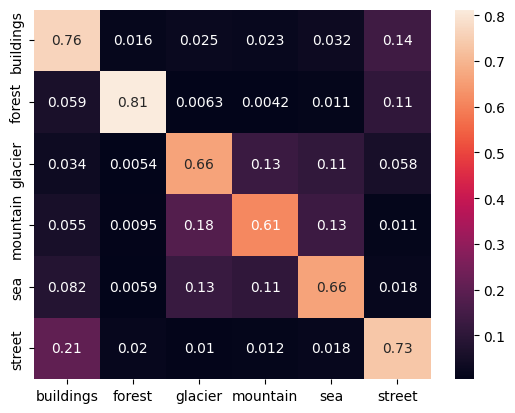

In [67]:
c_mat = confusion_matrix(y_test, pred_labels, normalize='true')
sns.heatmap(c_mat, annot=True, xticklabels=class_names, yticklabels=class_names)

In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_labels))

              precision    recall  f1-score   support

           0       0.60      0.76      0.67       437
           1       0.93      0.81      0.87       474
           2       0.67      0.66      0.67       553
           3       0.69      0.61      0.65       525
           4       0.68      0.66      0.67       510
           5       0.70      0.73      0.72       501

    accuracy                           0.70      3000
   macro avg       0.71      0.71      0.71      3000
weighted avg       0.71      0.70      0.71      3000



In [71]:
model_3 = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), input_shape=(64,64,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(16, (3,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(32),
    keras.layers.Dense(16),
    keras.layers.Dense(6, activation="softmax")
])
model_3.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history_3 = model_3.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=30,
    validation_split=0.2,
    callbacks=[keras.callbacks.EarlyStopping(patience=5)]
)

Epoch 1/30
88/88 [==============================] - 17s 173ms/step - loss: 1.4327 - accuracy: 0.4487 - val_loss: 1.3176 - val_accuracy: 0.4795
Epoch 2/30
88/88 [==============================] - 15s 166ms/step - loss: 1.0241 - accuracy: 0.6148 - val_loss: 1.2308 - val_accuracy: 0.5294
Epoch 3/30
88/88 [==============================] - 14s 159ms/step - loss: 0.9270 - accuracy: 0.6596 - val_loss: 1.0506 - val_accuracy: 0.6095
Epoch 4/30
88/88 [==============================] - 13s 153ms/step - loss: 0.8576 - accuracy: 0.6839 - val_loss: 1.2505 - val_accuracy: 0.5237
Epoch 5/30
88/88 [==============================] - 14s 161ms/step - loss: 0.7979 - accuracy: 0.7043 - val_loss: 1.0775 - val_accuracy: 0.5867
Epoch 6/30
88/88 [==============================] - 14s 158ms/step - loss: 0.7754 - accuracy: 0.7141 - val_loss: 0.9072 - val_accuracy: 0.6591
Epoch 7/30
88/88 [==============================] - 14s 160ms/step - loss: 0.7227 - accuracy: 0.7368 - val_loss: 1.0739 - val_accuracy: 0.6352

In [72]:
results = model_3.evaluate(X_test, y_test)

94/94 [==============================] - 1s 9ms/step - loss: 0.8592 - accuracy: 0.7177
